# Network Science:  Network Resilience


Network resilience refers to the ability of a network to maintain its essential functions when faced with disruptions, such as the loss of nodes. This concept is important in various fields like telecommunications, social networks, and transportation systems. By examining how the size of the largest group of connected nodes changes as nodes are removed, we can then visualize and assess a network's robustness.

---
**Submitted by:** SLT7B
- Bermejo, Irene Therese
- Macalalad, Karth Ian
---


In [56]:
# IMPORT LIBRARIES
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# HELPER FUNCTIONS
def calculate_cluster_metrics(G, fraction_removed):
    '''Calculate size of largest cluster and average size of other clusters'''
    # Remove random nodes based on fraction
    num_nodes_to_remove = int(fraction_removed * G.number_of_nodes())
    nodes_to_remove = list(np.random.choice(
        G.nodes(), num_nodes_to_remove, replace=False))
    G.remove_nodes_from(nodes_to_remove)

    # Calculate size of the largest connected component
    largest_cluster_size = (
        max(len(c) for c in nx.connected_components(G))
        if G.number_of_nodes() > 0 else 0
    )

    # Calculate average size of other isolated clusters
    isolated_clusters = [
        len(c) for c in nx.connected_components(G)
        if len(c) < largest_cluster_size]
    avg_isolated_cluster_size = (
        np.mean(isolated_clusters) if isolated_clusters else 0
    )

    return largest_cluster_size, avg_isolated_cluster_size


def simulate_fraction_removal(G, name, steps=20):
    # Iterate for different values of fractions removed
    fractions_removed = np.linspace(0, 1, steps)
    largest_cluster_sizes = []
    avg_isolated_cluster_sizes = []

    for fraction in fractions_removed:
        G_copy = G.copy()
        largest_cluster, avg_isolated_cluster = calculate_cluster_metrics(
            G_copy, fraction)
        largest_cluster_sizes.append(largest_cluster)
        avg_isolated_cluster_sizes.append(avg_isolated_cluster)

    # Plot
    fig, ax1 = plt.subplots()
    color = 'tab:blue'
    ax1.set_xlabel('Fraction f of removed nodes')
    ax1.set_ylabel('Size of Largest Cluster', color=color)
    ax1.plot(
        fractions_removed,
        largest_cluster_sizes,
        color=color,
        label='Size of Largest Cluster'
    )
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:purple'
    ax2.set_ylabel('Average size of isolated clusters', color=color)
    ax2.plot(
        fractions_removed,
        avg_isolated_cluster_sizes,
        color=color, linestyle='--',
        label='Avg Size of Isolated Clusters'
    )
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout() 
    plt.title(f'Network Resilience Graph ({name})')
    plt.show()

Below is the implementation of resilience graphs to compare the robustness of different types of networks, such as Erdős-Rényi, Watts-Strogatz, and Barabási-Albert models. 

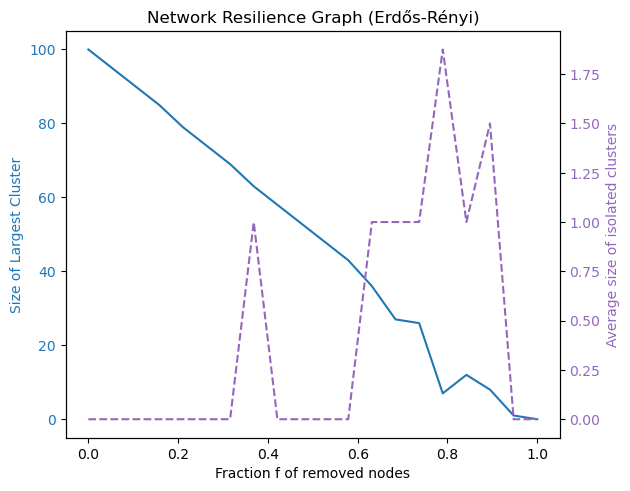

In [54]:
# Initialize Random graph (Erdős-Rényi)
G_er = nx.erdos_renyi_graph(n=100, p=0.1, seed=42)
simulate_fraction_removal(G_er, 'Erdős-Rényi')

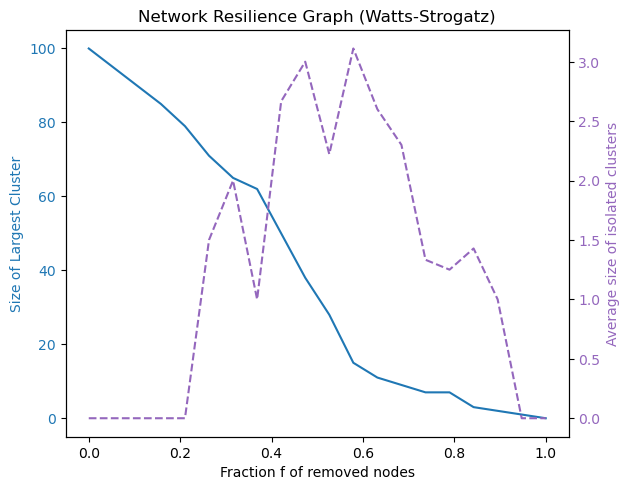

In [51]:
G_ws = nx.watts_strogatz_graph(n=100, k=5, p=0.3, seed=42)
simulate_fraction_removal(G_ws, 'Watts-Strogatz')

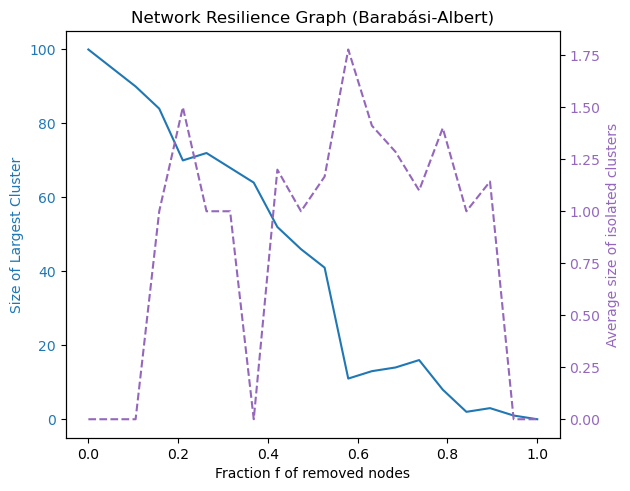

In [55]:
G_ws = nx.barabasi_albert_graph(n=100, m=2, seed=42)
simulate_fraction_removal(G_ws, 'Barabási-Albert', steps=20)

This comparison shows how different network structures respond to node removal.

- Erdős-Rényi Graph: Typically shows a gradual decline in the size of the largest cluster as nodes are removed, reflecting its random nature.
- Watts-Strogatz Graph: Often maintains larger clusters longer due to its high clustering coefficient and small-world properties, resulting in more resilient connectivity.
- Barabási-Albert Graph: Generally demonstrates strong resilience against node removal compared to the other 2 networks until a critical point. This is due to its scale-free nature.

    
Understanding network resilience helps us in designing systems that can better withstand failures and continue to operate effectively.